In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, BoundaryNorm
import warnings
from tqdm import tqdm
import re
import random


# Example usage:
from invasion import (
    compute_nontrivial_slice,
    simulate_segment,
    compute_deltaW_curve,
    compare_severities,
    test_plot,
    compare_scalers,
    run_cycles,
    run_cycles_ext,
    simulate_segment2,
    run_invasion,
    pairwise_invasion_plot,
    piplot,
    local_invasibility_heatmap,
    local_invasibility_path,
    global_invasability,
    test_invasion,
)

W_birth = 0.4
W_death = 0.1
Y_birth = 0.9
Y_death = 0.15

X_in = 0.1
X_out = 0.1
Z_in = 0.5
Z_out = 0.25

Time = 600.0
dt = 0.1

use_X = True
use_Z = False

num_points = 100
severity = 0.5
cycles = 20000
extinction_rate = 50
U_out = 0.05
U_in = U_out
X_out = 0.06
X_in = X_out

W,Y = compute_nontrivial_slice(W_birth, W_death, Y_birth, Y_death)
W0 = W/2
X0 = W0 / (X_out / X_in)
V0 = W - W0
U0 = V0 / (U_out / U_in)
Y0 = Y
Z0 = Y0 / (Z_out /Z_in)
dt = 0.1


U_in = 0.2
U_out = 0.02

Scanning X_in: 100%|██████████| 11/11 [17:09<00:00, 93.56s/it] 


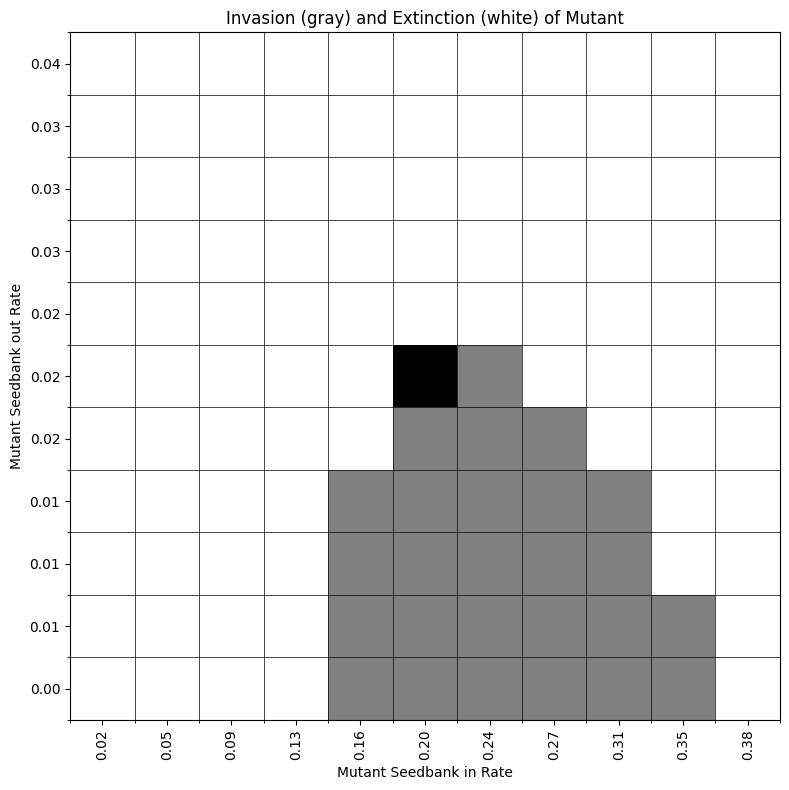

In [2]:
x = global_invasability(
    V0=V0, W0=W0, Y0=Y0,
    W_birth=W_birth, Y_birth=Y_birth, W_death=W_death,
    Y_death=Y_death,
    Z_in=Z_in, Z_out=Z_out,
    extinction_rate=extinction_rate,
    dt=dt,
    use_X=use_X, use_Z=use_Z,
    cycles=cycles,
    severity=severity,
    grid_size=11,
    U_in=U_in, U_out=U_out,
    X_in_range=U_in-0.0001,
    X_out_range=U_out-0.0001,
    perturb_W=False, perturb_Y=True,
    speedplot=False, break_threshold=0.002)

(array([  5.,   4.,   1.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,
          3.,   0.,   1.,   0.,   1.,   2.,   0.,   0., 100.]),
 array([0.        , 0.00050518, 0.00101036, 0.00151554, 0.00202072,
        0.0025259 , 0.00303108, 0.00353626, 0.00404144, 0.00454662,
        0.0050518 , 0.00555697, 0.00606215, 0.00656733, 0.00707251,
        0.00757769, 0.00808287, 0.00858805, 0.00909323, 0.00959841,
        0.01010359]),
 <BarContainer object of 20 artists>)

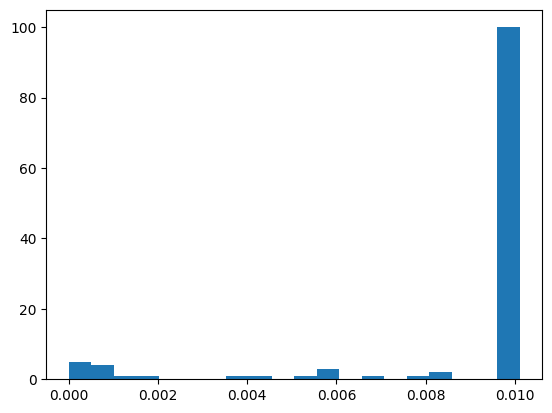

In [18]:
plt.hist(abs(x[2].flatten()), bins=20, density=False)


In [15]:
x[2].shape

(11, 11)

In [20]:
x

(array([0.001 , 0.0148, 0.0286, 0.0424, 0.0562, 0.07  , 0.0838, 0.0976,
        0.1114, 0.1252, 0.139 ]),
 array([0.001 , 0.0048, 0.0086, 0.0124, 0.0162, 0.02  , 0.0238, 0.0276,
        0.0314, 0.0352, 0.039 ]),
 array([[-0.01002739, -0.01000742, -0.01000193, -0.01000253, -0.00316664,
          0.00325913,  0.00684861,  0.00881499,  0.00981217,  0.01000172,
          0.01000235],
        [-0.01005561, -0.01000304, -0.01001736, -0.01000423, -0.01000325,
          0.00981498,  0.01000519,  0.01000741,  0.01000719,  0.01000561,
          0.01000943],
        [-0.01010477, -0.01001636, -0.0100172 , -0.01001563, -0.01000077,
          0.01000079,  0.01000205,  0.01000672,  0.01000361,  0.01000263,
          0.01000671],
        [-0.01004161, -0.01000919, -0.01001652, -0.01002063, -0.01000219,
          0.00886138,  0.01000046,  0.0100063 ,  0.01001507,  0.01001345,
          0.01000008],
        [-0.01008146, -0.01001341, -0.01000044, -0.01002296, -0.01000445,
          0.00504062,  0.01000

In [21]:
X_in_vals = x[0]
X_out_vals = x[1]

Saved run_invasion plot to run_invasion/run_invasion45.pdf


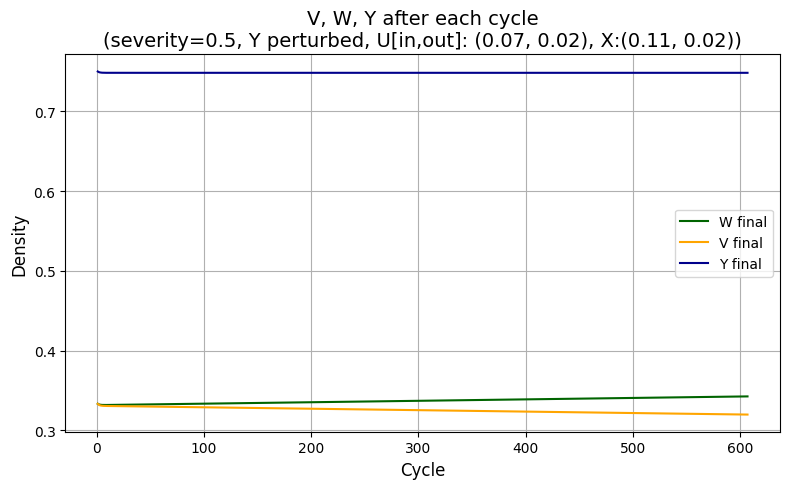

0.010006956912388731

In [22]:
X_in = X_in_vals[8]
X_out = X_out_vals[5]
run_invasion(
            V0, W0, Y0,
            W_birth, Y_birth,
            W_death, Y_death,
            X_in, X_out,
            U_in, U_out,
            Z_in, Z_out,
            extinction_rate, dt,
            use_X, use_Z,
            severity,
            cycles=cycles,
            perturb_W=False,
            perturb_Y=True,
            plot=True
        )